# Multi-Dimensional Scaling (MDS)

\begin{equation}
\min_Y \mid D^{(X)} - D^{(Y)} \mid ^2
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
n_points = 2000
X, color = datasets.samples_generator.make_swiss_roll(n_points,0.01, random_state=0)

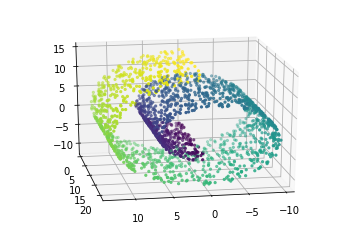

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color,marker='.')
ax.view_init(20, 80)
plt.show()

## The Multi-Dimensional Scaling (MDS) Algorithm
- Compute the matrix of squared pairwise similarities $D, D_{ij} = \| x _i - x_j\|^2$

In [4]:
data = X
ndata = np.shape(data)[0]
ndim = np.shape(data)[1]
d = np.zeros((ndata,ndata),dtype=float)

# Compute the distance matrix
for i in range(ndata):
    for j in range(i+1,ndata):
        for k in range(ndim):
            d[i,j] += (data[i,k] - data[j,k])**2
        d[i,j] = np.sqrt(d[i,j])
        d[j,i] = d[i,j]
d = d**2

- Compute $J = I_N −1/N$ (where $I_N$ is the $N×N$ identity function and $N$ is the number of datapoints)

In [5]:
J = np.eye(ndata) - np.ones((ndata, ndata))/ndata
J.shape

(2000, 2000)

- Compute $B = -\frac{1}{2} JDJ^T$

In [6]:
B = -J.dot(d).dot(J.T)/2
B.shape

(2000, 2000)

- Find the $L$ largest eigenvalues $\lambda_i$ of $B$, together with the corresponding eigenvectors $e_i$

In [7]:
evals, evecs = np.linalg.eigh(B)
evals = np.real(evals)
# Sort by eigenvalue in descending order                                                  
idx   = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:,idx]


In [8]:
evals.shape

(2000,)

- Put the eigenvalues into a diagonal matrix $V$ and set the eigenvectors to be columns of matrix $P$

- Compute the embedding as $X = PV^{1/2}$

In [9]:
import warnings
warnings.filterwarnings('ignore')
V  = np.diag(np.absolute(np.sqrt(evals)))
P  = evecs
Y  = P.dot(V)

In [10]:
Y.shape

(2000, 2000)

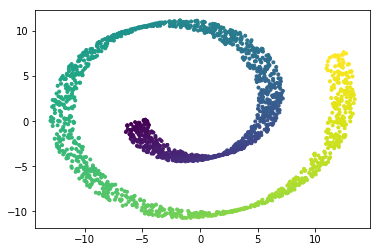

In [11]:
trans_data = Y[:,0:2]
plt.scatter(trans_data[:, 0], trans_data[:, 1], c=color, marker='.')
plt.show()

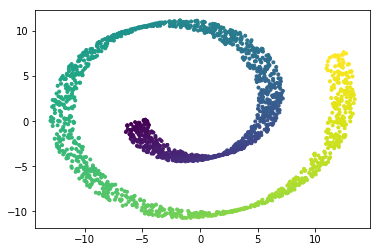

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
Y = pca.transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, marker='.')

plt.show()

## Real Dataset

In [16]:
def subplot_rawl(data, names=None):
    labels = iris.target
    fig, axs = plt.subplots(1, len(data), figsize=(12, 5))
    colors = ['turquoise', 'navy', 'darkorange']


    for a, d in zip(range(0,len(data)), data):
        for i, c, label in zip(target_ids, colors,iris.target_names):
            axs[a].scatter(d[i == labels, 0], d[i == labels, 1], c = c, edgecolors='black', s=250,label=label, marker='.')
            axs[a].legend()
        if names:
            axs[a].set_title(names[a])

In [17]:
from sklearn import manifold
iris = datasets.load_iris()
y = iris.target
target_ids = np.unique(iris.target)

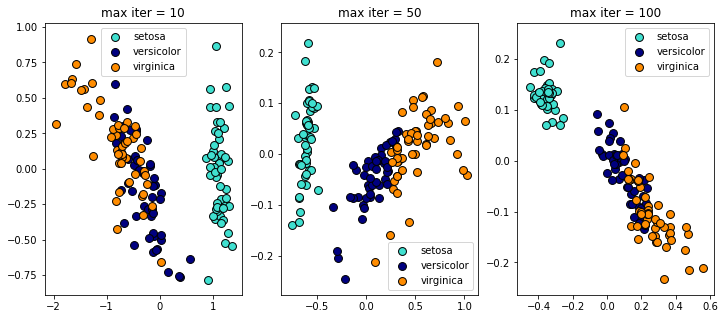

In [18]:

md1 = manifold.MDS(10,2).fit_transform(iris.data)

md2 = manifold.MDS(50,2).fit_transform(iris.data)

md3 = manifold.MDS(100,2).fit_transform(iris.data)

new_data2 = [md1, md2, md3]
names = ['max iter = 10', 'max iter = 50', 'max iter = 100']
subplot_rawl(new_data2, names)